In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.filters.hp_filter import hpfilter

data_path = os.path.join(os.getcwd(), 'data')

plt.style.use('ggplot')

In [2]:
metadata = {
    "A072RC1Q156SBEA": {
        "description": "Personal saving as a percentage of disposable personal income",
        "name": "Personal Savings Rate",
        "source": "FRED",
        "url": "https://fred.stlouisfed.org/series/A072RC1Q156SBEA",
        "category": "savings"
    },
    "AMTMNO": {
        "description": "Total Manufacturing Inventories",
        "name": "Total Manufacturing Inventories",
        "source": "FRED",
        "url": "https://fred.stlouisfed.org/series/AMTMNO",
        "category": "output"
    },
    "CCSA": {
        "description": "Continuing Claims (Insured Unemployment)",
        "name": "Continuing Claims",
        "source": "FRED",
        "url": "https://fred.stlouisfed.org/series/CCSA",
        "category": "employment"
    },
    "CPIAUCSL": {
        "description": "Consumer Price Index for All Urban Consumers: All Items",
        "name": "CPI Headline",
        "source": "FRED",
        "url": "https://fred.stlouisfed.org/series/CPIAUCSL",
        "category": "prices"
    },
    "CPILFESL": {
        "description": "Consumer Price Index for All Urban Consumers: All Items Less Food and Energy",
        "name": "CPI Core",
        "source": "FRED",
        "url": "https://fred.stlouisfed.org/series/CPILFESL",
        "category": "prices"
    },
    "DRCCLACBS": {
        "description": "Delinquency Rate on Credit Card Loans, All Commercial Banks",
        "name": "Delinquency Rate on Credit Card",
        "source": "FRED",
        "url": "https://fred.stlouisfed.org/series/DRCCLACBS",
        "category": "consumption"
    },
    "DSPIC96": {
        "description": "Real Disposable Personal Income",
        "name": "Real Disposable Personal Income",
        "source": "FRED",
        "url": "https://fred.stlouisfed.org/series/DSPIC96",
        "category": "income"
    },
    "RPI": {
        "description": "Real Personal Income",
        "name": "Real Personal Income",
        "source": "FRED",
        "url": "https://fred.stlouisfed.org/series/RPI",
        "category": "income"
    },
    "GCEC1": {
        "description": "Real Government Consumption Expenditures and Gross Investment ",
        "name": "Real Government Investments",
        "source": "FRED",
        "url": "https://fred.stlouisfed.org/series/GCEC1",
        "category": "investments"
    },
    "GDPC1": {
        "description": "Real Gross Domestic Product",
        "name": "Real GDP",
        "source": "FRED",
        "url": "https://fred.stlouisfed.org/series/GDPC1",
        "category": "output"
    },
    "GPDIC1": {
        "description": "Real gross private domestic investment",
        "name": "Real Private Investments",
        "source": "FRED",
        "url": "https://fred.stlouisfed.org/series/GPDIC1",
        "category": "investments"
    },
    "ICSA": {
        "description": "Initial Claims",
        "name": "Initial Claims",
        "source": "FRED",
        "url": "https://fred.stlouisfed.org/series/ICSA",
        "category": "employment"
    },
    "INDPRO": {
        "description": "Industrial Production Index",
        "name": "IP",
        "source": "FRED",
        "url": "https://fred.stlouisfed.org/series/INDPRO",
        "category": "output"
    },
    "M318501Q027NBEA": {
        "description": "Federal government budget surplus or deficit (-)",
        "name": "US Government Budget",
        "source": "FRED",
        "url": "https://fred.stlouisfed.org/series/M318501Q027NBEA",
        "category": "fiscal"
    },
    "MYAGM2USM052S": {
        "description": "M2 for United States",
        "name": "US M2",
        "source": "FRED",
        "url": "https://fred.stlouisfed.org/series/MYAGM2USM052SNBR",
        "category": "liquidity"
    },
    "PPIFES":{
        "description": "Producer Price Index by Commodity: Final Demand: Final Demand Less Foods and Energy",
        "name": "PPI Core",
        "source": "FRED",
        "url": "https://fred.stlouisfed.org/series/PPIFES",
        "category": "prices"
    },
    "PRFI": {
        "description": "Private Residential Fixed Investment",
        "name": " Private Residential Fixed Investment",
        "source": "FRED",
        "url": "https://fred.stlouisfed.org/series/PRFI",
        "category": "investments"
    },
    "RSXFS": {
        "description": "Advance Retail Sales: Retail Trade",
        "name": "Advanced Retail Sales",
        "source": "FRED",
        "url": "https://fred.stlouisfed.org/series/RSXFS",
        "category": "consumption"
    },
    "W068RCQ027SBEA": {
        "description": "Government total expenditures",
        "name": "Government total expenditures",
        "source": "FRED",
        "url": "https://fred.stlouisfed.org/series/W068RCQ027SBEA",
        "category": "fiscal"
    },
    "W998RC1Q027SBEA": {
        "description": "Gross private saving: Households and institutions ",
        "name": "Gross private saving",
        "source": "FRED",
        "url": "https://fred.stlouisfed.org/series/W998RC1Q027SBEA",
        "category": "savings"
    },

}

In [4]:
pd.DataFrame(metadata).T.reset_index().rename(columns={"index": "ticker"})[["ticker", "description", "name", "category", "source", "url"]].sort_values("category").to_csv("base_us_macro_regimes.csv")

In [7]:
ticker = "CPIAUCSL"
des = metadata[ticker]

# load data
data = pd.read_csv(os.path.join(data_path, ticker + ".csv"), index_col=0, parse_dates=True)
data.index.name = "date"

# rename column
data.rename(columns={ticker: des['name']}, inplace=True)

### Raw data

<AxesSubplot:title={'center':'CPI Headline'}, xlabel='date'>

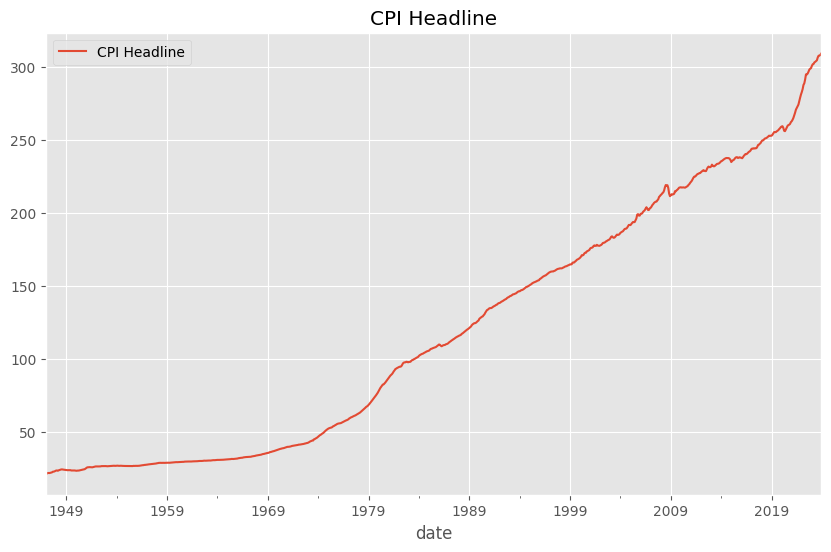

In [8]:
data.plot(figsize=(10, 6), title=des['name'])

### Seasonally adjusted

<AxesSubplot:title={'center':'CPI Headline'}, xlabel='date'>

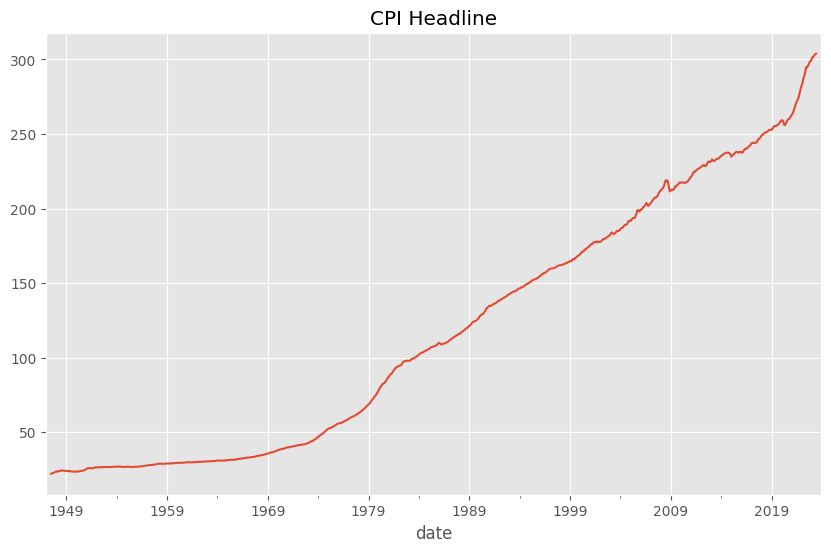

In [9]:
decomposition = sm.tsa.seasonal_decompose(data, model='additive')
seasonally_adjusted = decomposition.trend + decomposition.resid

seasonally_adjusted.plot(figsize=(10, 6), title=des['name'])

### Relevant transformations

In [28]:
data_transf = data.copy()

data_transf[f"{des['name']} Cyclical"], data_transf[f"{des['name']} Trend"]  = hpfilter(data_transf, lamb=1600)
data_transf[f"{des['name']} Change"] = data_transf[des['name']].pct_change(12) * 100

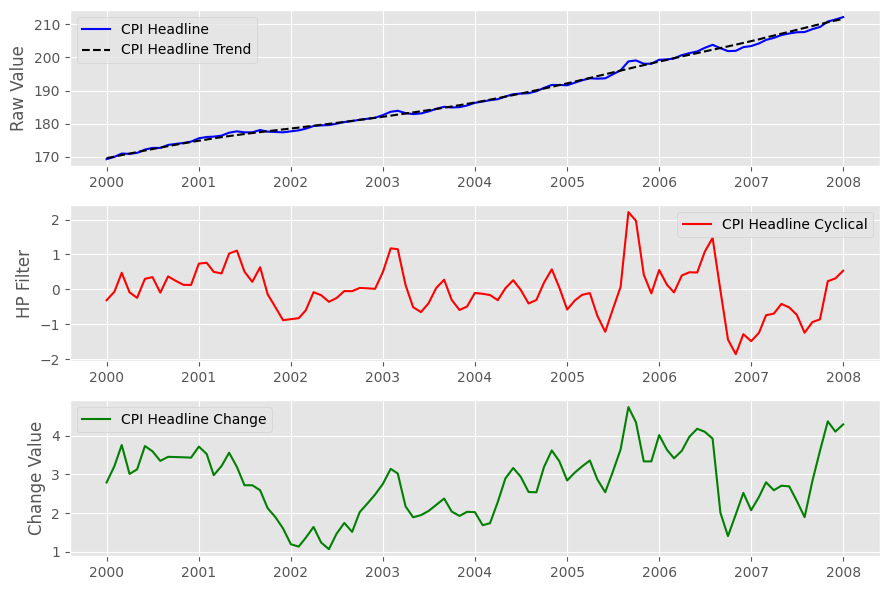

In [29]:
plot_df = data_transf.copy().loc["2000-01-01":"2008-01-01"]

# Plotting the GDP data with its trend and a separate plot for the cyclical component
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(9, 6))

# Plotting the actual GDP and its trend component
axes[0].plot(plot_df[des['name']], label=des['name'], color='blue')
axes[0].plot(plot_df[f"{des['name']} Trend"], label=f"{des['name']} Trend", color='black', linestyle='--')
axes[0].set_ylabel('Raw Value')
axes[0].legend()

# Plotting the cyclical component
axes[1].plot(plot_df[f"{des['name']} Cyclical"], label=f"{des['name']} Cyclical", color='red')
axes[1].set_ylabel('HP Filter')
axes[1].legend()

# Plotting the cyclical component
axes[2].plot(plot_df[f"{des['name']} Change"], label=f"{des['name']} Change", color='green')
axes[2].set_ylabel('Change Value')
axes[2].legend()

plt.tight_layout()
plt.show()

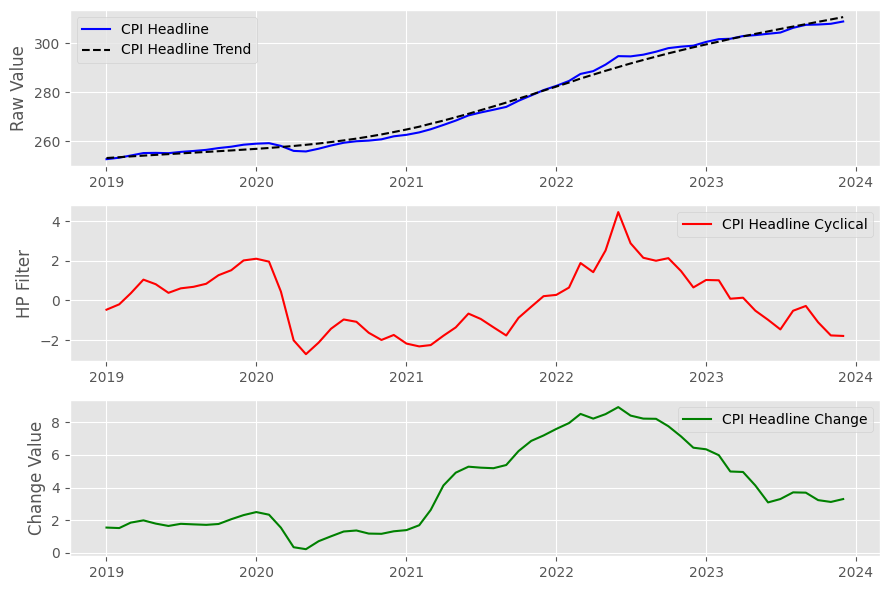

In [30]:
plot_df = data_transf.copy().loc["2019-01-01":]

# Plotting the GDP data with its trend and a separate plot for the cyclical component
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(9, 6))

# Plotting the actual GDP and its trend component
axes[0].plot(plot_df[des['name']], label=des['name'], color='blue')
axes[0].plot(plot_df[f"{des['name']} Trend"], label=f"{des['name']} Trend", color='black', linestyle='--')
axes[0].set_ylabel('Raw Value')
axes[0].legend()

# Plotting the cyclical component
axes[1].plot(plot_df[f"{des['name']} Cyclical"], label=f"{des['name']} Cyclical", color='red')
axes[1].set_ylabel('HP Filter')
axes[1].legend()

# Plotting the cyclical component
axes[2].plot(plot_df[f"{des['name']} Change"], label=f"{des['name']} Change", color='green')
axes[2].set_ylabel('Change Value')
axes[2].legend()

plt.tight_layout()
plt.show()

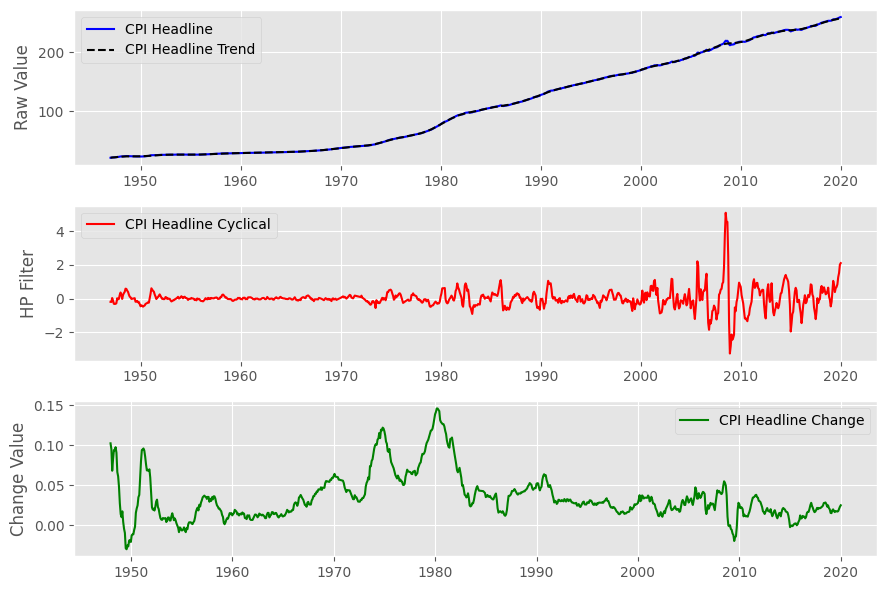

In [25]:
plot_df = data_transf.copy().loc[:"2020-01-01"]

# Plotting the GDP data with its trend and a separate plot for the cyclical component
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(9, 6))

# Plotting the actual GDP and its trend component
axes[0].plot(plot_df[des['name']], label=des['name'], color='blue')
axes[0].plot(plot_df[f"{des['name']} Trend"], label=f"{des['name']} Trend", color='black', linestyle='--')
axes[0].set_ylabel('Raw Value')
axes[0].legend()

# Plotting the cyclical component
axes[1].plot(plot_df[f"{des['name']} Cyclical"], label=f"{des['name']} Cyclical", color='red')
axes[1].set_ylabel('HP Filter')
axes[1].legend()

# Plotting the cyclical component
axes[2].plot(plot_df[f"{des['name']} Change"], label=f"{des['name']} Change", color='green')
axes[2].set_ylabel('Change Value')
axes[2].legend()

plt.tight_layout()
plt.show()

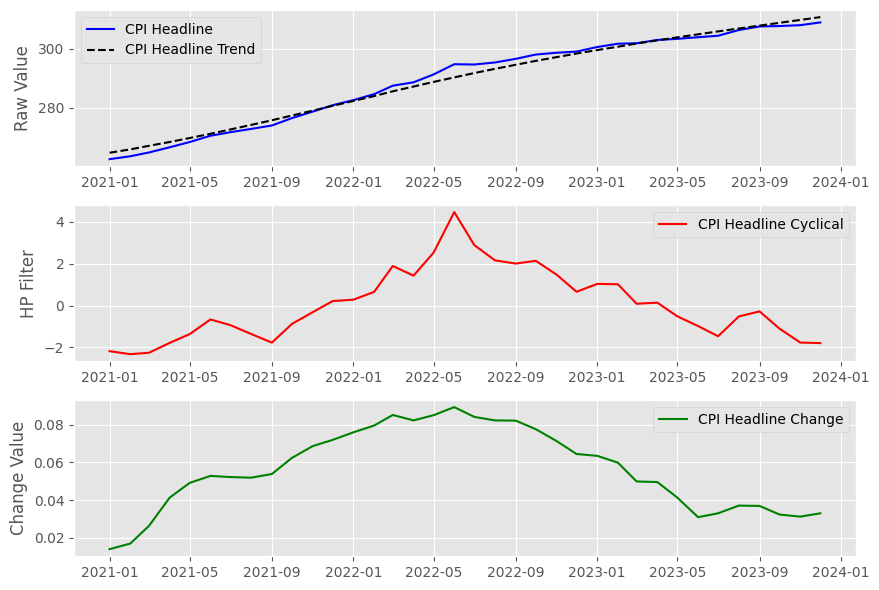

In [26]:
plot_df = data_transf.copy().loc["2021-01-01":""]

# Plotting the GDP data with its trend and a separate plot for the cyclical component
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(9, 6))

# Plotting the actual GDP and its trend component
axes[0].plot(plot_df[des['name']], label=des['name'], color='blue')
axes[0].plot(plot_df[f"{des['name']} Trend"], label=f"{des['name']} Trend", color='black', linestyle='--')
axes[0].set_ylabel('Raw Value')
axes[0].legend()

# Plotting the cyclical component
axes[1].plot(plot_df[f"{des['name']} Cyclical"], label=f"{des['name']} Cyclical", color='red')
axes[1].set_ylabel('HP Filter')
axes[1].legend()

# Plotting the cyclical component
axes[2].plot(plot_df[f"{des['name']} Change"], label=f"{des['name']} Change", color='green')
axes[2].set_ylabel('Change Value')
axes[2].legend()

plt.tight_layout()
plt.show()